In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from matplotlib.ticker import PercentFormatter
import matplotlib.patches as mpatches

In [130]:
my_dir = "/Users/samhsu/Documents/THESIS/Out/"
ground_truth_log = pd.read_csv("/Users/samhsu/Documents/THESIS/Data/best_obs_onesheet.csv")

In [131]:
def read_ground_truth(ob):
    file = ob + "_second_codings.csv"
    ground_truth = pd.read_csv(my_dir + file)
    return ground_truth

In [132]:
# Get the names of the observations and remove the observations we excluded
observations = set(ground_truth_log['Observation'])
observations.remove("AM10DO1_R_FINAL_C")
observations.remove("AM02DO2_J_copyB_FINAL_R") 
observations.remove("AM11DO1_N_copyB_FINAL_C") 
observations.remove("AM15DO2_M_copyB_FINAL_C") 
observations.remove("AM15DO2_N_copyB_FINAL")
observations

{'AM01DO1_J_FINAL_R',
 'AM01DO2_M_FINAL_R',
 'AM02DO1_J_FINAL_R',
 'AM02DO2_J_copyA_FINAL_R',
 'AM03DO1_M_FINAL_R',
 'AM03DO2_J_FINAL_R',
 'AM04DO1_J_FINAL_R',
 'AM04DO2_M_FINAL_R',
 'AM05DO2re_R_FINAL_C',
 'AM06DO1_J_FINAL_C',
 'AM06DO2_N_FINAL_C',
 'AM07DO1_R_FINAL_C',
 'AM07DO2_M_FINAL_R',
 'AM08DO1_J_copyA_FINAL_R',
 'AM08DO1_J_copyB_FINAL_R',
 'AM08DO2_J_FINAL_R',
 'AM09DO1_N_FINAL_R',
 'AM09DO2_M_FINAL_R',
 'AM10DO2_M_FINAL_R',
 'AM11DO1_N_copyA_FINAL_C',
 'AM11DO2_R_copyA_FINAL_C',
 'AM11DO2_R_copyB_FINAL_C',
 'AM12DO1_J_FINAL_C',
 'AM12DO2_J_copyA_FINAL_C',
 'AM12DO2_J_copyB_FINAL_C',
 'AM13DO1_N_FINAL_C',
 'AM13DO2_M_FINAL_R',
 'AM14DO1_J_FINAL_R',
 'AM14DO2_M_FINAL_R',
 'AM15DO1_R_FINAL_C',
 'AM15DO2_M_copyA_FINAL_C',
 'AM15DO2_N_copyA_FINAL_R',
 'AM16DO1_M_FINAL_R',
 'AM16DO2_M_FINAL_R',
 'AM17DO1_J_FINAL_R',
 'AM17DO2_M_FINAL_C',
 'AM18DO1_R_FINAL_C',
 'AM18DO2_N_FINAL_R',
 'AM19DO1_J_FINAL_R',
 'AM19DO2_R_FINAL_C',
 'AM20DO1_R_FINAL_C',
 'AM20DO2_R_FINAL_C',
 'AM21DO1_R_FI

In [133]:
def build_giant_ground_truth():
    giant_ground_truth = pd.DataFrame()
    size_check = 0
    
    for obs in observations:
        ground_truth = read_ground_truth(obs)
        ground_truth = ground_truth[:-1]
        giant_ground_truth = giant_ground_truth.append(ground_truth)
        
    return giant_ground_truth

## Build dataframe holding the ground truth for all observations

In [134]:
giant_ground_truth = build_giant_ground_truth()

In [135]:
giant_ground_truth.shape

(364891, 15)

In [136]:
giant_ground_truth.head()

,Unnamed: 0,observation,date,primary_behavior,primary_posture,primary_upperbody,primary_intensity,secondary_behavior,secondary_posture,secondary_upperbody,secondary_intensity,num_postures,transition,actual_time,time
0,1,AM11DO1_N_copyA_FINAL_C,04-06-2018,"PC- groom, health-related",LA- stand,no,light,None,None,None,None,1,0,12:13:10,0
1,2,AM11DO1_N_copyA_FINAL_C,04-06-2018,"PC- groom, health-related",LA- stand,no,light,None,None,None,None,1,0,12:13:11,1
2,3,AM11DO1_N_copyA_FINAL_C,04-06-2018,"PC- groom, health-related",LA- stand,no,light,None,None,None,None,1,0,12:13:12,2
3,4,AM11DO1_N_copyA_FINAL_C,04-06-2018,"PC- groom, health-related",LA- stand,no,light,None,None,None,None,1,0,12:13:13,3
4,5,AM11DO1_N_copyA_FINAL_C,04-06-2018,"PC- groom, health-related",LA- stand,no,light,None,None,None,None,1,0,12:13:14,4


The number of transitions should be equal to the number of state start seconds that are postures and not the beginning of the observation (Time_Relative_sf > 0)...?

In [137]:
giant_ground_truth['transition'].value_counts()

0    355868
1      9023
Name: transition, dtype: int64

In [138]:
exclude_obs = ["AM10DO1_R_FINAL_C", "AM02DO2_J_copyB_FINAL_R", "AM11DO1_N_copyB_FINAL_C", "AM15DO2_M_copyB_FINAL_C", "AM15DO2_N_copyB_FINAL"]
fixed_log = ground_truth_log.loc[(~ground_truth_log['Observation'].isin(exclude_obs))]
fixed_log['Event_Type'].value_counts()

State start    9910
State stop     9910
State point     894
Name: Event_Type, dtype: int64

In [139]:
behaviors = pd.read_csv("/Users/samhsu/Documents/THESIS/Data/coding_options_20180729_behaviors.csv")
behaviors

,Behavior,Modifier_2
0,PC-Sleep,NaN
1,"PC- groom, health-related",NaN
2,PC-other personal care,NaN
3,HA- Housework,NaN
4,HA- Food prep and cleanup,NaN
5,"HA- Interior Maintenance, Repair, & Decoration",NaN
6,"HA- Exterior Maintenance, Repair, & Decoration",NaN
7,"HA- Lawn, Garden and Houseplants",NaN
8,HA- Animals and Pets,NaN
9,HA- Household Management/other household activ...,NaN


In [140]:
only_postures = fixed_log.loc[(fixed_log['Event_Type'] == "State start") # state start rows
                                     & (~fixed_log['Behavior'].isin(behaviors['Behavior'])) # postures
                                     & (fixed_log['Time_Relative_sf'] > 0)] # not the first row in the observation
only_postures.shape

(9381, 18)

# Data Plots

In [141]:
postures = giant_ground_truth[['primary_posture', 'primary_intensity']]
postures

,primary_posture,primary_intensity
0,LA- stand,light
1,LA- stand,light
2,LA- stand,light
3,LA- stand,light
4,LA- stand,light
5,LA- stand,light
6,LA- stand,light
7,LA- stand,light
8,LA- stand and move,light
9,LA- stand and move,light


In [142]:
posture_types = set(postures['primary_posture'])
posture_types

{'LA- kneeling/ squatting',
 'LA- stand',
 'LA- stand and move',
 'LA- stand and move with unidentifiable upper body movement',
 'LA- stand and move with upper body movement',
 'LA- stretching',
 'SB- lying',
 'SB-sitting',
 'SP- bike',
 'SP- other sport movement',
 'WA- ascend stairs',
 'WA- descend stairs',
 'WA- running',
 'WA- walk',
 'WA-walk with load',
 'private/not coded'}

In [143]:
for posture in posture_types:
    p = postures.loc[(postures['primary_posture'] == posture)]
    print(posture)
    print(p['primary_intensity'].value_counts())
    #x_postures = p['primary_intensity'].value_counts().index.tolist()
    #x_values = p['primary_intensity'].value_counts().values.tolist()
    #x_percentage = x / x.sum()
    #maj_intensity = max(x_values)

private/not coded
private/not coded    2434
Name: primary_intensity, dtype: int64
LA- stand and move with upper body movement
light       6948
moderate    3262
vigorous      23
Name: primary_intensity, dtype: int64
SB-sitting
sedentary    177116
Name: primary_intensity, dtype: int64
LA- stretching
sedentary    433
Name: primary_intensity, dtype: int64
LA- stand and move
light       16967
moderate      265
vigorous       66
Name: primary_intensity, dtype: int64
WA- running
vigorous    9236
moderate      13
Name: primary_intensity, dtype: int64
WA- walk
moderate    20148
light        7126
vigorous      768
Name: primary_intensity, dtype: int64
SB- lying
sedentary    27
Name: primary_intensity, dtype: int64
LA- stand and move with unidentifiable upper body movement
light       876
moderate     16
Name: primary_intensity, dtype: int64
LA- stand
light    89987
Name: primary_intensity, dtype: int64
LA- kneeling/ squatting
sedentary    3123
Name: primary_intensity, dtype: int64
SP- other spor

## How many seconds are spent in each posture?

### Primary Posture

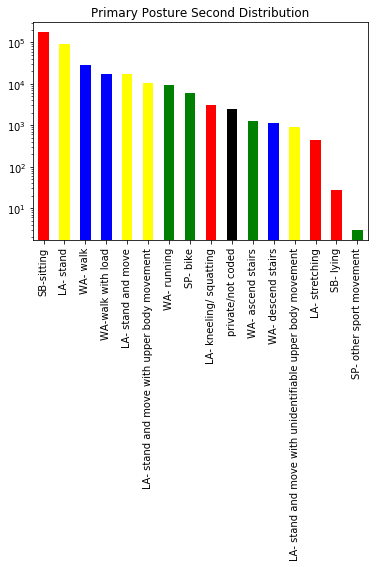

In [144]:
fig, ax = subplots()
primary_posture = giant_ground_truth['primary_posture'].value_counts()
x = primary_posture.plot(kind='bar', ax=ax, title = 'Primary Posture Second Distribution',
                    color=['red', 'yellow', 'blue', 'blue', 'yellow', 'yellow', 'green', 'green', 'red',
                          'black', 'green', 'blue', 'yellow', 'red', 'red', 'green'], legend=False)
ax.set_yscale('log')

### Primary and Secondary Postures

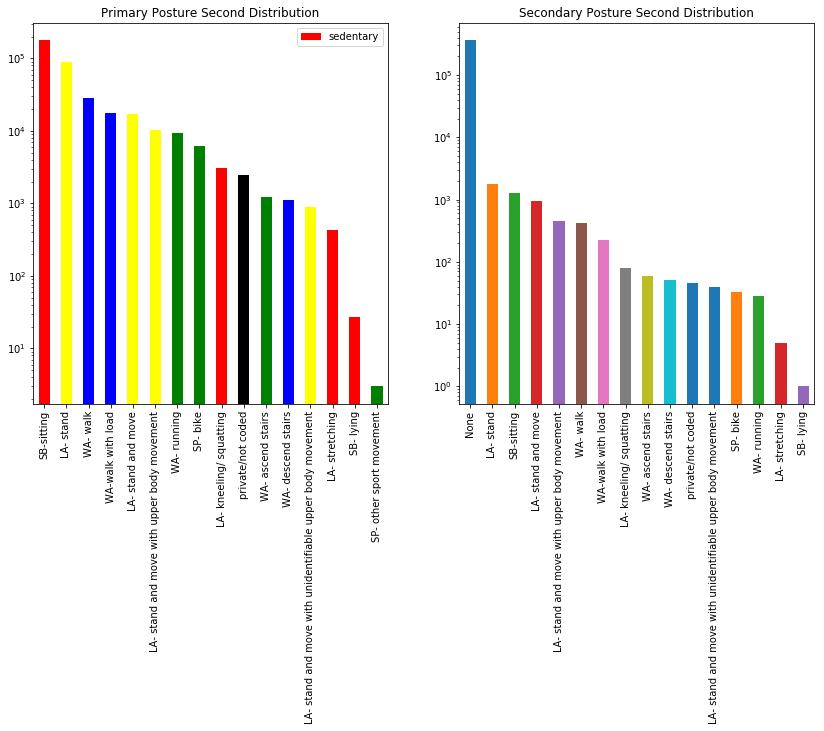

In [106]:
primary_posture = giant_ground_truth['primary_posture'].value_counts()
secondary_posture = giant_ground_truth['secondary_posture'].value_counts()
fig, axes = plt.subplots(ncols=2, figsize=(14,7))
#axes.plot(primary_posture, kind = 'bar')
axes[0].set_yscale('log')
axes[1].set_yscale('log')
primary_posture.plot(ax=axes[0], title = 'Primary Posture Second Distribution', kind='bar',
                    color=['red', 'yellow', 'blue', 'blue', 'yellow', 'yellow', 'green', 'green', 'red',
                          'black', 'green', 'blue', 'yellow', 'red', 'red', 'green'])
               
secondary_posture.plot(ax=axes[1], title = 'Secondary Posture Second Distribution', kind='bar')

# Save the full figure...
plt.savefig('full_figure.png')

# Save just the portion _inside_ the second axis's boundaries
extent = axes[0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
plt.savefig('ax2_figure.png', bbox_inches=extent)

# Pad the saved area by 10% in the x-direction and 20% in the y-direction
plt.savefig('ax2_figure_expanded.png', bbox_inches=extent.expanded(1.2, 3.0))

In [145]:
print("Primary posture counts:")
print(giant_ground_truth['primary_posture'].value_counts())
print()
print("Secondary posture counts:")
print(giant_ground_truth['secondary_posture'].value_counts())

Primary posture counts:
SB-sitting                                                    177116
LA- stand                                                      89987
WA- walk                                                       28042
WA-walk with load                                              17600
LA- stand and move                                             17298
LA- stand and move with upper body movement                    10233
WA- running                                                     9249
SP- bike                                                        6108
LA- kneeling/ squatting                                         3123
private/not coded                                               2434
WA- ascend stairs                                               1241
WA- descend stairs                                              1105
LA- stand and move with unidentifiable upper body movement       892
LA- stretching                                                   433
SB- lying 

#### Hardcoded dataframe for Sarah's primary posture histogram - combining all types of "stand and move" and removing "private"

   Primary_posture  Second_count
0              Sit        177116
1            Stand         89987
2   Stand and move         28423
3             Walk         28042
4     Walk w/ load         17600
5              Run          9249
6             Bike          6108
7      Kneel/Squat          3123
8    Ascend stairs          1241
9   Descend stairs          1105
10         Stretch           433
11           Lying            27
12     Other sport             3


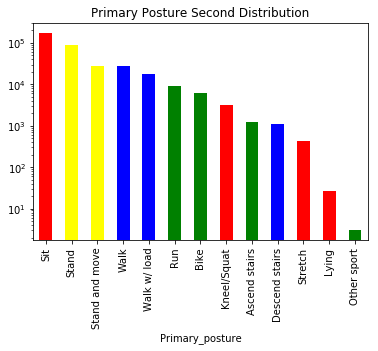

In [159]:
new_primary_posture = pd.DataFrame({'Primary_posture':['Sit', 'Stand', 'Stand and move', 'Walk', 'Walk w/ load',
                                                      'Run', 'Bike', 'Kneel/Squat', 'Ascend stairs',
                                                      'Descend stairs', 'Stretch', 'Lying', 'Other sport'],
                                    'Second_count':[177116, 89987, 28423, 28042, 17600, 9249, 6108,
                                                   3123, 1241, 1105, 433, 27, 3]})
print(new_primary_posture)
fig, ax = subplots()
x = new_primary_posture.plot(x='Primary_posture', y='Second_count', kind='bar', ax=ax, title = 'Primary Posture Second Distribution',
                    color=['red', 'yellow', 'yellow', 'blue', 'blue', 'green', 'green', 'red',
                          'green', 'blue', 'red', 'red', 'green'], legend=False)
ax.set_yscale('log')

plt.savefig('primary_postures.png')
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
plt.savefig('ax2_figure.png', bbox_inches=extent)

# Pad the saved area by 10% in the x-direction and 20% in the y-direction
plt.savefig('ax2_figure_expanded.png', bbox_inches=extent.expanded(1.2, 1.805))

## How many seconds are spent in each behavior?

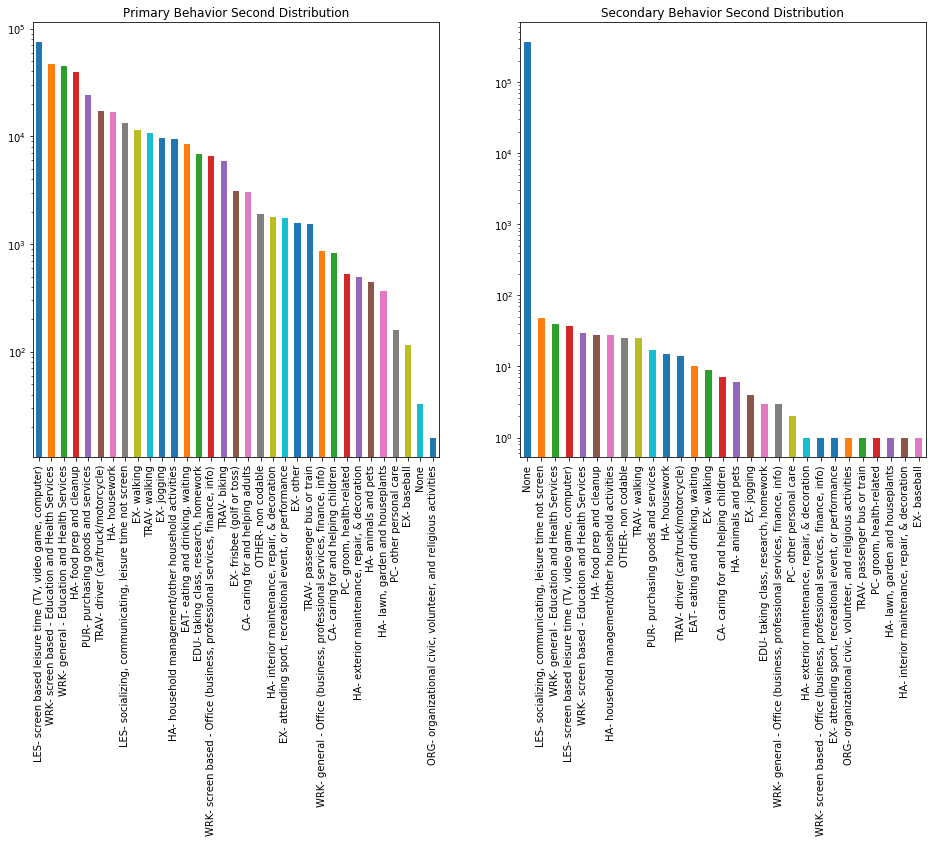

In [161]:
primary_behavior = giant_ground_truth['primary_behavior'].value_counts()
secondary_behavior = giant_ground_truth['secondary_behavior'].value_counts()
fig, axes = plt.subplots(ncols=2, figsize=(16,8))
axes[0].set_yscale('log')
axes[1].set_yscale('log')
primary_behavior.plot(ax=axes[0], title = 'Primary Behavior Second Distribution', kind='bar')
secondary_behavior.plot(ax=axes[1], title = 'Secondary Behavior Second Distribution', kind='bar')

In [162]:
print("Primary behavior counts:")
print(giant_ground_truth['primary_behavior'].value_counts())
print()
print("Secondary behavior counts:")
print(giant_ground_truth['secondary_behavior'].value_counts())

Primary behavior counts:
LES- screen based leisure time (TV, video game, computer)                      74801
WRK- screen based - Education and Health Services                              46495
WRK- general - Education and Health Services                                   44853
HA- food prep and cleanup                                                      39358
PUR- purchasing goods and services                                             24370
TRAV- driver (car/truck/motorcycle)                                            17299
HA- housework                                                                  16726
LES- socializing, communicating, leisure time not screen                       13375
EX- walking                                                                    11545
TRAV- walking                                                                  10742
EX- jogging                                                                     9607
HA- household management/other household

## How many seconds are spent in each intensity level?

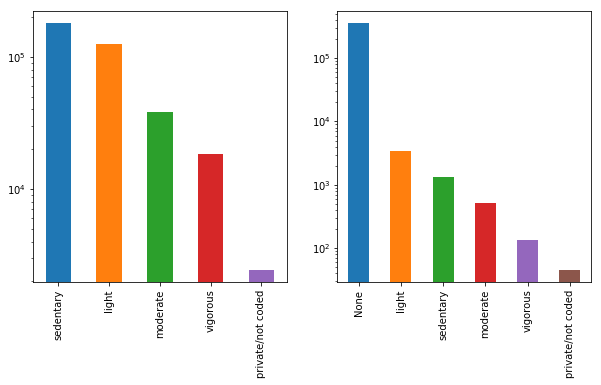

In [163]:
primary_intensity = giant_ground_truth['primary_intensity'].value_counts()
secondary_intensity = giant_ground_truth['secondary_intensity'].value_counts()
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
axes[0].set_yscale('log')
axes[1].set_yscale('log')
primary_intensity.plot(ax=axes[0], kind='bar')
secondary_intensity.plot(ax=axes[1], kind='bar')

In [164]:
print("Primary intensity counts:")
print(giant_ground_truth['primary_intensity'].value_counts())
print()
print("Secondary intensity counts:")
print(giant_ground_truth['secondary_intensity'].value_counts())

Primary intensity counts:
sedentary            180699
light                125275
moderate              38004
vigorous              18479
private/not coded      2434
Name: primary_intensity, dtype: int64

Secondary intensity counts:
None                 359478
light                  3374
sedentary              1341
moderate                517
vigorous                136
private/not coded        45
Name: secondary_intensity, dtype: int64


## How many seconds are transitions?

/Users/samhsu/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


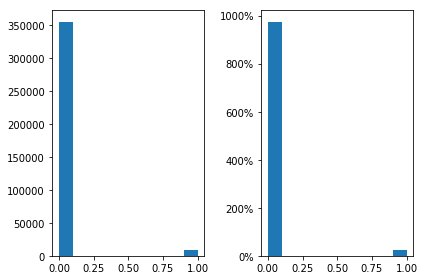

In [165]:
transitions = giant_ground_truth['transition']
fig, axs = plt.subplots(1, 2, tight_layout=True)
axs[0].hist(transitions)
axs[1].hist(transitions, density=True)
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

In [166]:
print("Transition second counts:")
print(giant_ground_truth['transition'].value_counts())

Transition second counts:
0    355868
1      9023
Name: transition, dtype: int64


## How many seconds have 1 posture, 2 postures, or 3 postures?

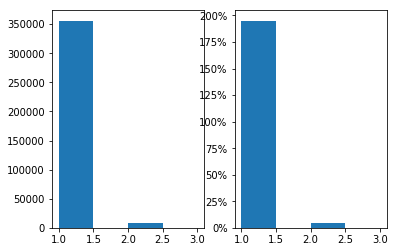

In [167]:
transitions = giant_ground_truth['num_postures']
fig, axs = plt.subplots(1, 2)
axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[0].set_xticks(np.arange(0, 3, step=1))
axes[1].set_xticks(np.arange(0, 3, step=1))
axs[0].hist(transitions, bins=4)
axs[1].hist(transitions, bins=4, density=True)
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

In [168]:
print("Num postures counts:")
print(giant_ground_truth['num_postures'].value_counts())

Num postures counts:
1    355874
2      9004
3        13
Name: num_postures, dtype: int64


## Checking transition seconds

In [169]:
giant_ground_truth.loc[(giant_ground_truth['num_postures'] == 1) & (giant_ground_truth['transition'] == 1)]

,Unnamed: 0,observation,date,primary_behavior,primary_posture,primary_upperbody,primary_intensity,secondary_behavior,secondary_posture,secondary_upperbody,secondary_intensity,num_postures,transition,actual_time,time
4636,4637,AM10DO2_M_FINAL_R,24-06-2018,WRK- general - Education and Health Services,WA- walk,unknown,moderate,None,None,None,None,1,1,12:37:11,4636
4155,4156,AM15DO2_M_copyA_FINAL_C,30-04-2018,WRK- general - Education and Health Services,LA- stand,yes,light,None,None,None,None,1,1,17:01:13,4155
4555,4556,AM15DO2_M_copyA_FINAL_C,30-04-2018,WRK- general - Education and Health Services,LA- stand,unknown,light,None,None,None,None,1,1,17:07:53,4555
18,19,AM11DO2_R_copyA_FINAL_C,03-08-2018,EX- frisbee (golf or toss),LA- stand and move,unknown,light,None,None,None,None,1,1,09:11:18,18
4393,4394,AM25DO2_M_FINAL_R,07-05-2018,"LES- screen based leisure time (TV, video game...",SB-sitting,no,sedentary,None,None,None,None,1,1,12:35:10,4393
6390,6391,AM21DO2_M_FINAL_C,25-06-2018,WRK- screen based - Education and Health Services,LA- stand,yes,light,None,None,None,None,1,1,13:56:39,6390


AM10DO2_M_FINAL_R: time = 4636, 